# Laboratorium 3 - Singular Value Decomposition

##### Aleksandra Mazur

## Zadanie 1 Przekształcenie sfery w elipsoidę

#### 1.

Wykorzystując równanie parametryczne narysowano sferę jednostkową w 3D

\begin{equation}
V = 
  \begin{bmatrix}
    cos(s)sin(t) \\
    sin(s)sin(t) \\
    cos(t)
  \end{bmatrix}
  \label{eq:aeqn}
\end{equation}

\begin{equation}
s \in [0, 2\pi] \\
t \in [0, \pi]
\end{equation}

In [1]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

In [2]:
s = np.linspace(0, 2 * np.pi, 100)
t = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(s), np.sin(t))
y = np.outer(np.sin(s), np.sin(t))
z = np.outer(np.ones(np.size(s)), np.cos(t))

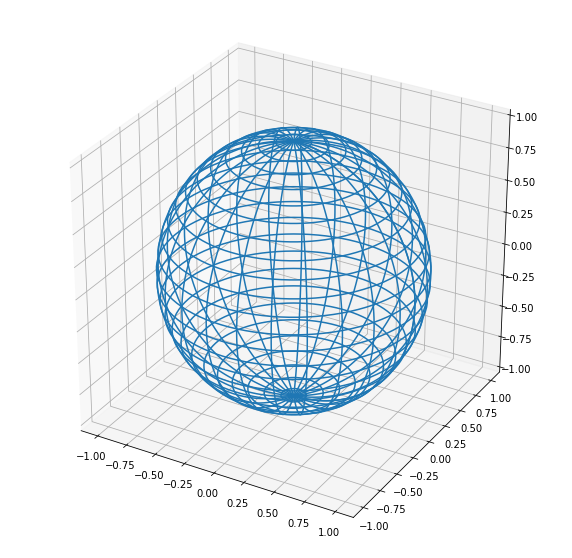

In [3]:
fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection = '3d')
ax.plot_wireframe(x, y, z, rstride = 4, cstride = 4)
plt.show()

Jak widać otrzymano sferę o środku w punkcie (0,0,0) i promieniu 1.

#### 2.

Wygenerowano 3 rózne macierze $\textbf{A1, A2, A3, } (\textbf{Ai} \in \mathbb{R}^{3x3})$

In [4]:
A1 = np.random.rand(3,3)
A2 = np.random.rand(3,3)
A3 = np.random.rand(3,3)

In [5]:
A1, A2, A3

(array([[0.09885748, 0.58019189, 0.80487694],
        [0.69290789, 0.22533743, 0.83861263],
        [0.98277652, 0.52848921, 0.74861854]]),
 array([[0.78982274, 0.2589992 , 0.78965112],
        [0.17680759, 0.74738493, 0.04681578],
        [0.10077874, 0.66561484, 0.14733637]]),
 array([[0.65725459, 0.72869938, 0.07666112],
        [0.50687628, 0.03414837, 0.06570921],
        [0.15041507, 0.94930807, 0.48017465]]))

Za pomocą powyższych macierzy przekształcono sfery w elipsoidy.

In [6]:
S, T = np.meshgrid(s, t)

v = [lambda s, t : np.cos(s)*np.sin(t),
     lambda s, t : np.sin(s)*np.sin(t),
     lambda s, t : np.cos(t)]

X = v[0](S,T).flatten()
Y = v[1](S,T).flatten()
Z = v[2](S,T).flatten()

In [7]:
def plot_3D(x, y, z):
    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes(projection="3d")
    ax.plot3D(x, y, z)
    plt.show()

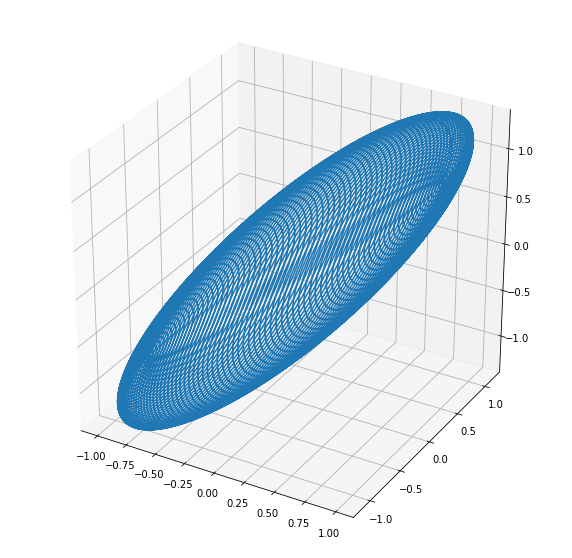

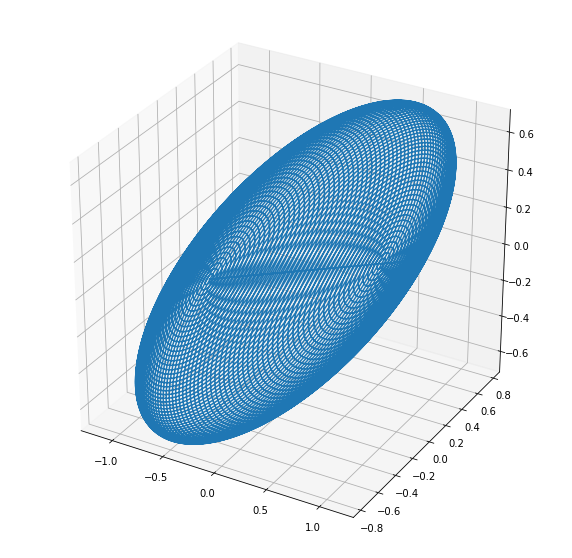

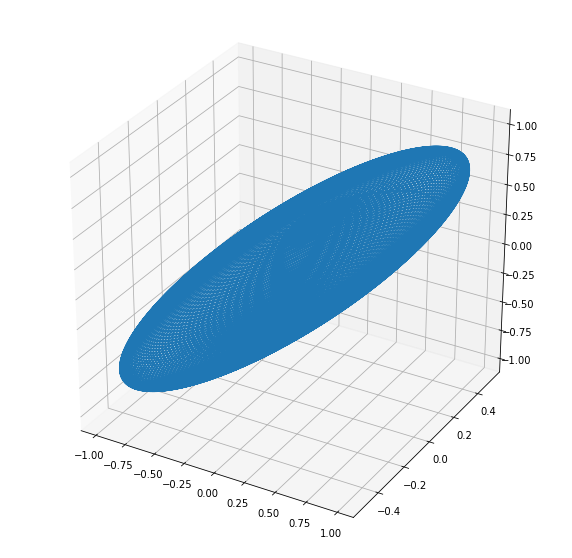

In [8]:
ST = np.row_stack([X, Y, Z])

P1 = A1 @ ST
P2 = A2 @ ST
P3 = A3 @ ST

plot_3D(P1[0], P1[1], P1[2])
plot_3D(P2[0], P2[1], P2[2])
plot_3D(P3[0], P3[1], P3[2])

#### 3.

Dla każdej ze stworzonych macierzy dokonano rozkładu według wartosci osobliwych (SVD).

In [9]:
U1, S1, Vh1 = np.linalg.svd(A1)
U2, S2, Vh2 = np.linalg.svd(A2)
U3, S3, Vh3 = np.linalg.svd(A3)

In [10]:
x_start, y_start, z_start = [0,0,0]
x_end = y_end = z_end = [0,0,0]

In [31]:
def SVD_plot(sigma, P, U):
    for i, s1 in enumerate(np.diag(sigma)):
        a = np.dot(U, s1)
        x_end[i] = a[0]
        y_end[i] = a[1]
        z_end[i] = a[2]
    quiver = [x_start, y_start, z_start, x_end, y_end, z_end]

    fig = plt.figure(figsize = (10, 10))
    ax = fig.gca(projection='3d')
    ax.scatter(x, y, z)
    ax.scatter(P[0], P[1], P[2], color='red')
    ax.quiver(x_start, y_start, z_start, x_end, y_end, z_end, color='black')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_zlim(-1.5, 1.5)
    plt.show()

#### Macierz $A_1$

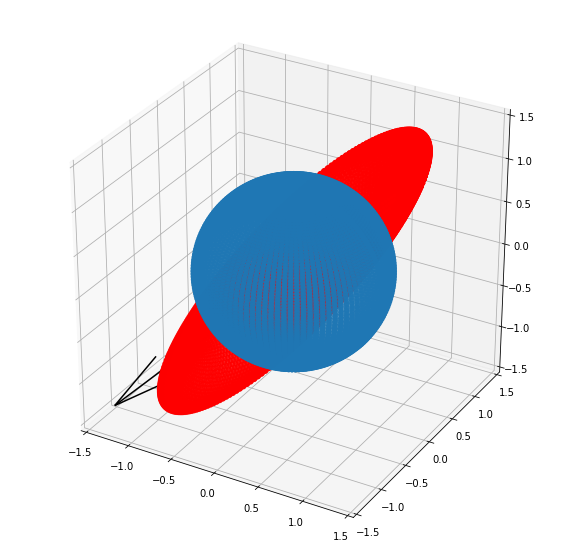

In [32]:
SVD_plot(S1, P1, U1)

#### Macierz $A_2$

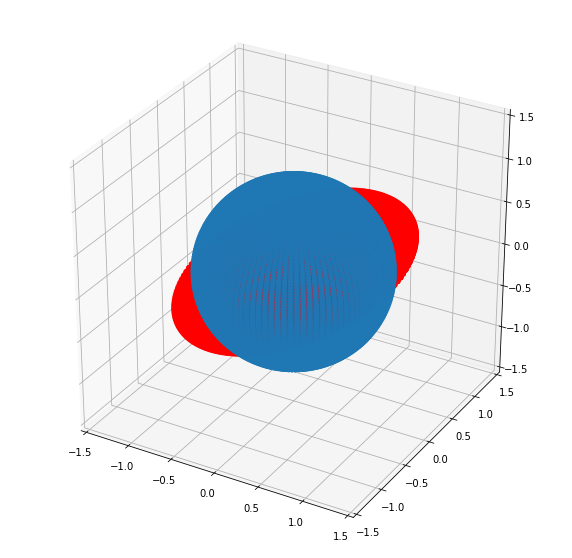

In [15]:
SVD_plot(S2, P2, U2)

#### Macierz $A_3$

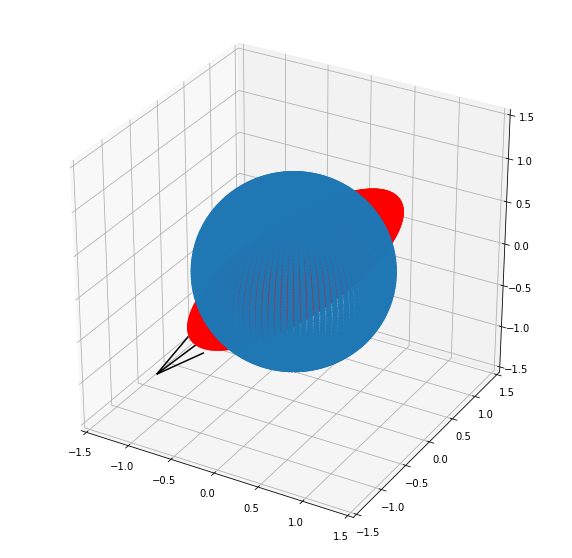

In [16]:
SVD_plot(S3, P3, U3)

#### 4.

Znaleziono taką macierz Ai, aby stosunek jej największej i najmniejszej wartości osobliwej był większy od 100.

In [17]:
def find_matrix():
    A4 = np.random.rand(3, 3)
    U4, S4, Vh4 = np.linalg.svd(A4)
    while S4[0] / S4[-1] < 100:
        A4 = np.random.rand(3, 3)
        U4, S4, Vh4 = np.linalg.svd(A4)
    print(A4)
    P4 = A4 @ ST
    plot_3D(P4[0], P4[1], P4[2])

[[0.96709694 0.14305954 0.93685199]
 [0.00294389 0.41422015 0.15078977]
 [0.10932756 0.62573725 0.33426437]]


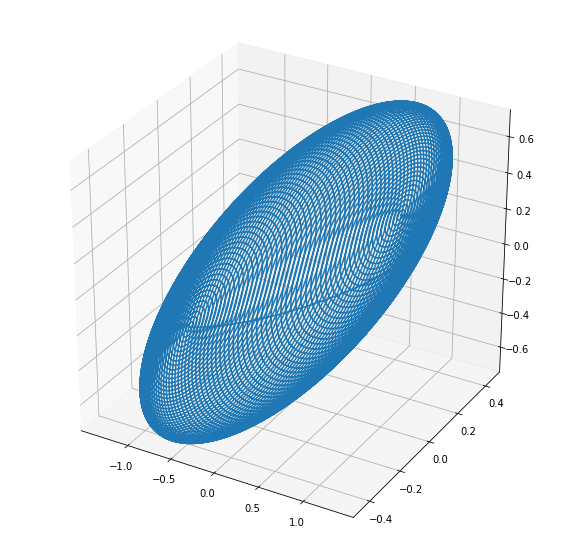

In [18]:
find_matrix()

#### 5.

Dla wybranej macierzy Ai przedstawiono wizualizacje $SV_i^T$, $S\Sigma_iV_i^T$ oraz $SU_i\Sigma_iV_i^T$

gdzie

$A_i = U_i\Sigma_iV_i^T$
oraz
$S$ - sfera z punktu 1.

Powyższe wizualizacje przedstawiono dla macierzy $A_1$.

In [19]:
U, sigma, V = np.linalg.svd(A1)

a) $SV_i^T$

In [20]:
def ex5a():
    E = V.T @ ST
    plot_3D(E[0], E[1], E[2])

In [ ]:
ex5a()

b) $S\Sigma_iV_i^T$

In [ ]:
def ex5b():
    E = ST.T * sigma @ V
    E = E.T
    plot_3D(E[0], E[1], E[2])

In [ ]:
ex5b()

c) $SU_i\Sigma_iV_i^T$

In [ ]:
def ex5c():
    E = ST.T @ U * sigma @ V
    
    plot_3D(E[0], E[1], E[2])

In [ ]:
ex5c()

## Zadanie 2 Kompresja obrazu

Przygotowano przykładowe zdjęcie o rozmiarze 512 × 512 pikseli.

<img src="Lenna.png">

In [ ]:
import imageio
Lenna = np.asarray(imageio.imread('Lenna.png'))
U, S, V = np.linalg.svd(Lenna)

In [ ]:
Lenna

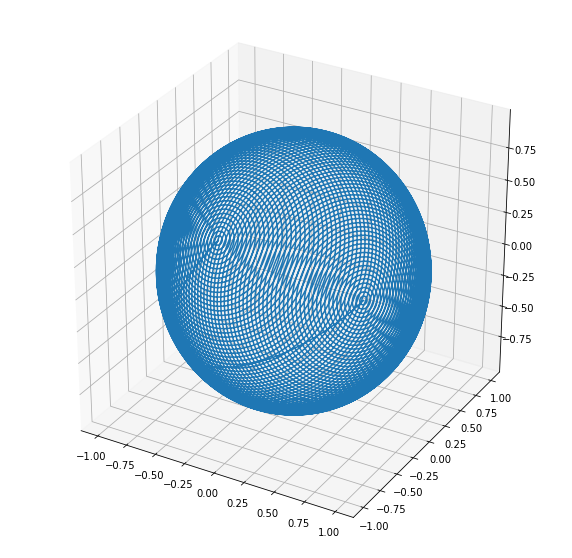

In [21]:
Lenna

b) $S\Sigma_iV_i^T$

In [22]:
def ex5b():
    E = ST.T * sigma @ V
    E = E.T
    plot_3D(E[0], E[1], E[2])

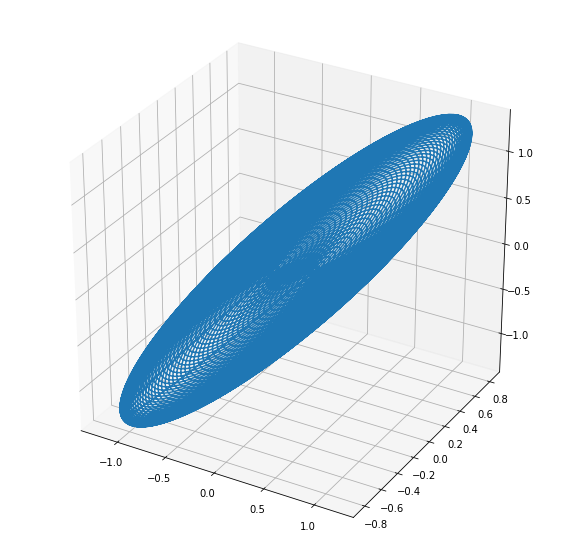

In [23]:
ex5b()

c) $SU_i\Sigma_iV_i^T$

In [25]:
def ex5c():
    E = ST.T @ U * sigma @ V
    
    plot_3D(E[0], E[1], E[2])

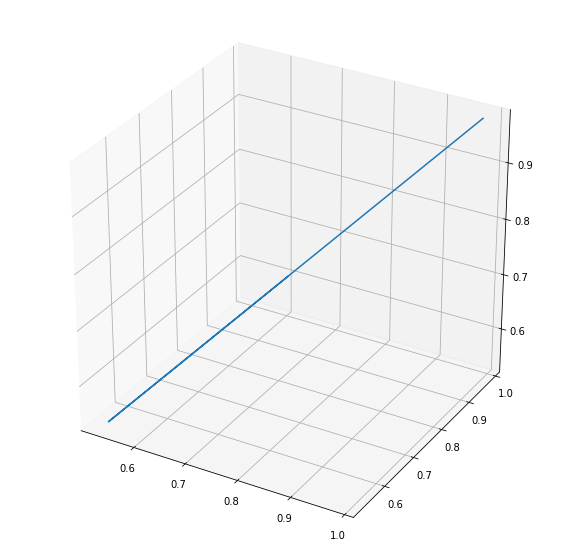

In [26]:
ex5c()

## Zadanie 2 Kompresja obrazu

Przygotowano przykładowe zdjęcie o rozmiarze 512 × 512 pikseli.

<img src="Lenna.png">

In [35]:
import imageio
Lenna = np.asarray(imageio.imread('Lenna.png'))
U, S, V = np.linalg.svd(Lenna)

In [36]:
Lenna

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]